In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic scaling
import seaborn as sns

In [2]:
d = pd.read_csv('../tables/d.csv', parse_dates=['Time_Start', 'Time_Stop', 'Time_Mid'])
d['tot'] = d[['Org_AMS_STP', 'SO4_AMS_STP', 'NO3_AMS_STP', 'NH4_AMS_STP', 'Chl_AMS_STP']].sum(axis=1)
d['s'] = (d.Time_Mid - d.Time_Mid.dt.normalize()).dt.total_seconds()

In [4]:
def pick_day(d, date_str):
    return d[d.Time_Start.dt.date==pd.Timestamp(date_str).date()]

In [24]:
def t_s(d, ax):


     # Create a colormap
    cmap = mpl.colormaps.get_cmap('rainbow_r')  # You can choose any colormap you like
    norm = LogNorm(vmin=d['Dp'].unique().min(), vmax=d['Dp'].unique().max())
    lab = ['SS', 'AmnSulf']
    ris = [1.5484, 1.530]
    cs = ['blue', 'red']
    samps = 2
    for j in range(samps):
        ax.text(x=(d.s.max()-d.s.min())*.02+d.s.min(), y=ris[j], s=lab[j], 
                va='top', ha='left')
        ax.axhline(ris[j], alpha=0.5, ls='--', color=cs[j])

    
    for dp in sorted(d['Dp'].unique()):
        dj = d[d.Dp==dp].copy()
        # Plot with seconds after midnight on the x-axis
        ax.scatter(dj.s, dj.RI, s=(dp/200)*2*15, color=cmap(norm(dp)), label = int(dp), alpha=0.7)

# Case 1 – cloud wall

In [ ]:
d1 = pick_day(d, '2024-06-07')
d1 = d[(d.s > 55100) & (d.s < 61350)]

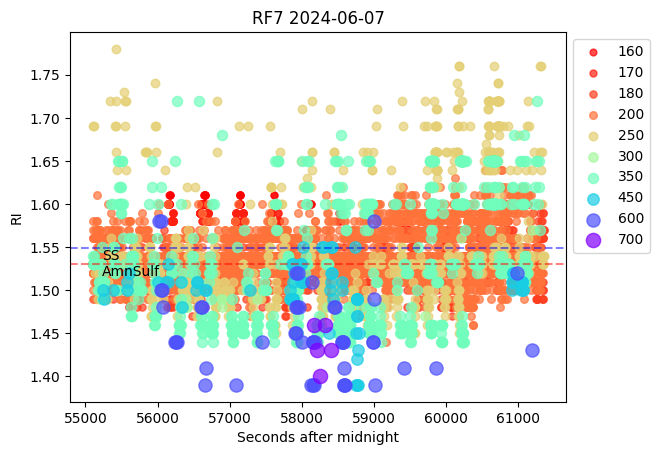

In [31]:
fig, ax = plt.subplots()
t_s(d1, ax)
ax.set_title('RF7 2024-06-07')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Seconds after midnight')
ax.set_ylabel('RI')
plt.savefig('../figures/1_ts.png', dpi=300, bbox_inches = 'tight')

"\nplt.xlabel('Category')\nplt.ylabel('RI')\nplt.title('Boxplots of RI for Different Categories')\nplt.xticks(rotation=30)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\n"

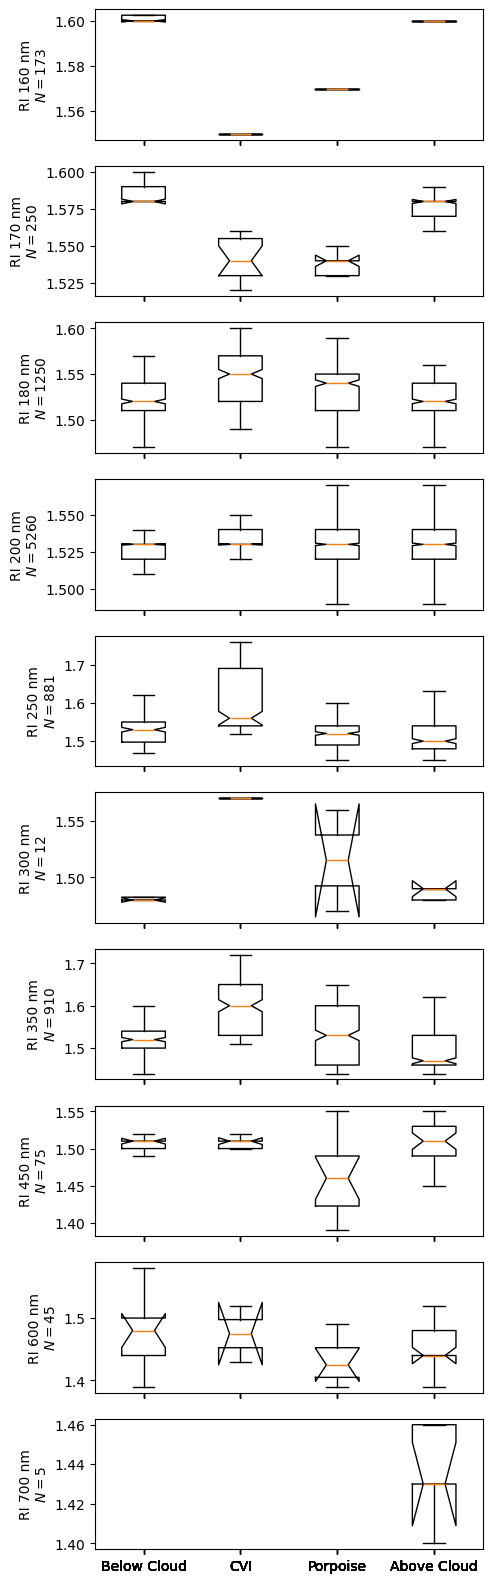

In [72]:
Dps = sorted(d1.Dp.unique())
fig,ax = plt.subplots(len(Dps), figsize=(5,2*len(Dps)), sharex=True)

for i in range(len(Dps)):
    di = d1[d1.Dp == Dps[i]].copy()

    # Define categories
    conditions = [
        (di['s'].between(55100, 56700)),
        (di['s'].between(60400, 61350)),
        (di['s'].between(58600, 60400)),
        (di['s'].between(56870, 58570))
        
    ]
    categories = ['Below Cloud', 'CVI', 'Porpoise', 'Above Cloud']


    # Assign category labels
    di['Category'] = None
    for j, condition in enumerate(conditions):
        di.loc[condition, 'Category'] = categories[j]

    # Prepare data for plotting
    data = [di.loc[di['Category'] == cat, 'RI'].dropna() for cat in categories]

    
    N = 0
    for j in range(4):
       N += len(data[j])

    ax[i].boxplot(data, tick_labels=categories, showfliers=False, notch=True)
    ax[i].set_ylabel('RI ' +  str(int(Dps[i])) + ' nm\n$N = $' + str(N))

fig.savefig('../figures/1_boxplots.png', dpi=300, bbox_inches='tight')
'''
plt.xlabel('Category')
plt.ylabel('RI')
plt.title('Boxplots of RI for Different Categories')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
'''

"\nplt.xlabel('Category')\nplt.ylabel('RI')\nplt.title('Boxplots of RI for Different Categories')\nplt.xticks(rotation=30)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\n"

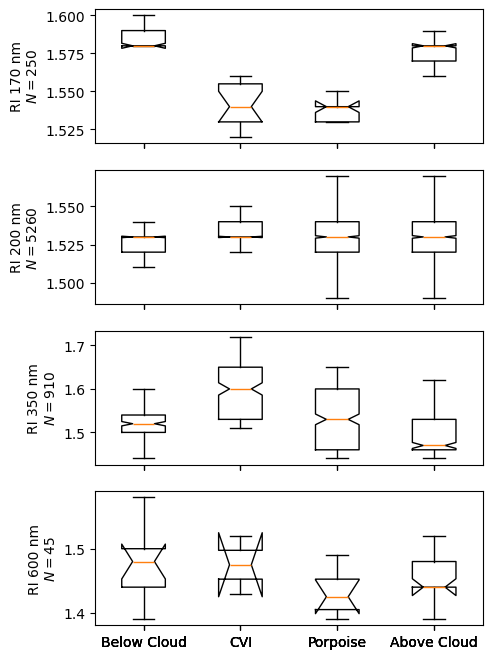

In [73]:
Dps = [170, 200, 350, 600]
fig,ax = plt.subplots(len(Dps), figsize=(5,2*len(Dps)), sharex=True)

for i in range(len(Dps)):
    di = d1[d1.Dp == Dps[i]].copy()

    # Define categories
    conditions = [
        (di['s'].between(55100, 56700)),
        (di['s'].between(60400, 61350)),
        (di['s'].between(58600, 60400)),
        (di['s'].between(56870, 58570))
        
    ]
    categories = ['Below Cloud', 'CVI', 'Porpoise', 'Above Cloud']


    # Assign category labels
    di['Category'] = None
    for j, condition in enumerate(conditions):
        di.loc[condition, 'Category'] = categories[j]

    # Prepare data for plotting
    data = [di.loc[di['Category'] == cat, 'RI'].dropna() for cat in categories]

    
    N = 0
    for j in range(4):
       N += len(data[j])

    ax[i].boxplot(data, tick_labels=categories, showfliers=False, notch=True)
    ax[i].set_ylabel('RI ' +  str(int(Dps[i])) + ' nm\n$N = $' + str(N))

fig.savefig('../figures/1_boxplots.png', dpi=300, bbox_inches='tight')
'''
plt.xlabel('Category')
plt.ylabel('RI')
plt.title('Boxplots of RI for Different Categories')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
'''

# Case 2 – Nares St

In [67]:
data

[Series([], Name: RI, dtype: float64),
 8830    1.46
 8831    1.43
 8832    1.40
 8833    1.46
 8834    1.43
 Name: RI, dtype: float64,
 Series([], Name: RI, dtype: float64),
 Series([], Name: RI, dtype: float64)]